# Land cover image classification using Sentinel 2 and bigearthnet data

In this exercise, we carry out a image classification of land cover using Sentinel 2 data. We use the labeled imagery  from bigearthnet with a convoluitonal deep learning model.


# Sentinel 2

There are three user products provided by the Copernicus program and the Sentinel 2 missions:

- Level 1B: Top of The Atmospher radiance in sensor geometry.
- Level 1C: Top of the Atmosphere reflectance in cartographic geometry.
- Level 2A. Top of reflectance in cartographic geometry

We use here Sentinel 2 level 2A data is an analysis ready (ARD) dataset containing 12 bands.

# Bigearthnet

Open Dataset produced at the Technical University of Berlin (Technische Universität Berlin, TU Berlin)by the Remote Sensing Image Analysis (RSiM) Group and the Database Systems and Information Management (DIMA) Group. It contains 590,326 pairs of Sentinel-1 and Sentinel-2 image patches. The Sentinel 2 image patches are 120x120 pixels (for 10m bands) in height and width and cover locations in Europe. This is a benchmark dataset that can be used for image classification.

It was produced with:

- labels produced using Corine land cover
- multilabel scene of each patch
- coverage over multiple countries in Europe
- coverage over multiple seasons

Tota
In this exercise we use a 258 random sample of the Sentinel 2 data using only Summer patches.

Useful links:

https://www.kaggle.com/code/nilesh789/land-cover-classification-with-eurosat-dataset

https://www.kaggle.com/datasets/kmader/satellite-images-of-hurricane-damage

- resnet50 model hub with bigearthnet:

https://www.kaggle.com/models/google/resnet50?tfhub-redirect=true

https://lgslm.medium.com/land-use-and-land-cover-classification-using-a-resnet-deep-learning-architecture-e353e7131ea4

data

https://github.com/jerpint/bigearthnet/blob/main/notebooks/bigearthnet_demo.ipynb


https://bigearth.net/

https://docs.kai-tub.tech/ben-docs/libraries.html


https://worldbank.github.io/OpenNightLights/tutorials/mod6_3_intro_to_sentinel2.html

https://developmentseed.org/tensorflow-eo-training/docs/Lesson3_deeplearning_crop_segmentation.html

- Multi label classification
https://keras.io/examples/nlp/multi_label_classification/

# Set up environment and load libraries

- load libraries
- install packages and tools
- authenticate to google drive and gcp account

In [ ]:
#!pip uninstall tensorflow -y
#!pip install  tensorflow==2.13 #specific version needed for BERT

In [ ]:
###### Library used in this script
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, glob

#ML imports
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Keras import
from tensorflow import keras
#from keras.models import Model
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Concatenate, Activation, MaxPool2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model


#from tensorflow.keras.utils import np_utils
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', None)

In [ ]:
from absl import logging
import tensorflow as tf

import tensorflow_hub as hub

In [ ]:
#install gdal to run from the terminal
!sudo add-apt-repository ppa:ubuntugis/ppa -y
!sudo apt-get update
!sudo apt-get install gdal-bin
!gdalinfo --version

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ppa.gpg with fingerprint 6B827C12C2D425E227EDCA75089EBE08314DF160
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,62

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#set up libararies for GIS/Geospatial
try: # try the following b+lock of code
  import geopandas as gpd
except: # if the try block throws an error, run the following
  !pip install geopandas # install geopandas
  import geopandas as gpd

try:
  import contextily as ctx # import
  import rasterio
except:
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  !pip install rasterio
import fiona # library for reading/writing GIS files, comes w/ geopandas
from shapely.geometry import Point, LineString, Polygon

!pip install pyproj
# Mapping,vector related imports
import geopandas as gpd
#import descartes #nessary for plotting in geopandas
from cartopy import crs as ccrs
from pyproj import Proj
#from osgeo import osr
from shapely import geometry
from shapely.geometry import Point
from shapely.geometry import box
from shapely.geometry import shape
from shapely.geometry import Polygon

from collections import OrderedDict
#rasterio imports, gdal and imagery utility
import rasterio
from rasterio.windows import Window
from osgeo import gdal
from rasterio import plot
from PIL import Image

#xarray and rio
!pip install rioxarray
!pip install mapclassify
!pip install earthpy

import mapclassify
import folium
import pyproj as proj
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from folium.utilities import none_max
import folium
from pyproj import Transformer

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.1.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 197 kB of archives.
After this operation, 504 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0 [197 kB]
Fetched 197 kB in 1s (245 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122847 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.1.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.1.1-1~jammy0) ...
Setting up proj-bin (9.1.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Don

In [ ]:
#!pip install jax>=0.4.9
!pip install bigearthnet_common

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.1 MB/s eta 0:00:00


In [ ]:
#import bigearthnet_common as ben
#ben.get_patches_to_country_mapping()
#https://github.com/kai-tub/bigearthnet_common
!pip install typing-extensions<4.6.0,>=3.6.6
from bigearthnet_common.base import s1_to_s2_patch_name
from bigearthnet_common.constants import BEN_S1_RE, BEN_S2_RE
from bigearthnet_common.example_data import (
    get_s1_example_folder_path,
    get_s1_example_patch_path,
    get_s2_example_folder_path,
    get_s2_example_patch_path,
)

/bin/bash: line 1: 4.6.0,: No such file or directory


In [ ]:
#GCP account authentification
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Check for GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
print(tf.__version__) #should use higher tensorflow!!!

2.15.0


# Functions
In the next part of the script, we declare all the functions used in the sripts.  It is good practice to place functions at the beginning of a script or in an external source file. Here are the 13 functions used:

* **create_dir_and_check_existence**:  create and output directory given a path. The output directory will be the working directory throughout the analysis.


In [ ]:
def create_dir_and_check_existence(path):

    #Create a new directory
    try:
        os.makedirs(path)
    except:
        print ("directory already exists")

from matplotlib import pyplot

In [ ]:
def create_RGB(in_filename: str,
               out_filename :str,
               scale_list: str,
               out_dtype: str ='Byte') -> list[str,str]:

  '''

  Create RGB raster image from input a VRT file. This will compute the band statistics and scale values to visualize
  RGB using stretch (rescaling) with gdal_translate.

  :param in_filename: multiband input filename containing RGB band in the Red, Green and Blue order
  :param out_filename: output file name
  :param scale_list: list containing value of min and max trehsold to consider for streachign.

  '''

  if out_dtype=='Byte':
    min_val=0
    max_val=255
  if out_dtype=='Float32':
    min_val=0
    max_val=1

  if scale_list is None:
    ds = gdal.Open(in_filename)
    stats=ds.GetRasterBand(1).GetStatistics(0,1)
    print(stats)
    list_df_stats_RGB = []
    for band_val in (1,2,3):
      df_stats_val = update_raster_band_stats(in_filename,band_val=band_val)
      list_df_stats_RGB.append(df_stats_val)

    df_stats_RGB = pd.concat(list_df_stats_RGB).reset_index()

  list_args = ['gdal_translate',
              f'-scale_1 {str(df_stats_RGB.loc[0,["min"]].values[0])} {str(df_stats_RGB.loc[0,["max"]].values[0])} {min_val} {max_val}',
              f'-scale_2 {str(df_stats_RGB.loc[1,["min"]].values[0])} {str(df_stats_RGB.loc[1,["max"]].values[0])} {min_val} {max_val}',
              f'-scale_3 {str(df_stats_RGB.loc[2,["min"]].values[0])} {str(df_stats_RGB.loc[2,["max"]].values[0])} {min_val} {max_val}',
              f'-ot {out_dtype}',
              in_filename,
              out_filename]
  cmd_str = ' '.join([str(elem) for elem in list_args])
  import subprocess
  env = os.environ.copy() #this is necessary in google colab
  output_sub = subprocess.check_output(cmd_str, shell=True, env=env,text=True)

  return out_filename,cmd_str

In [ ]:
def update_raster_band_stats(in_filename: str,
                             band_val: int =1) -> pd.DataFrame:

  '''

  Update raster file stats using GDAL

  :param in_filename: input file name
  :param band_val: band value to be updated
  :return df_stats: DataFrame containing statistics including min,max,mean and std.

  '''
  ds = gdal.Open(in_filename,1) # The 1 means that you are opening the file to edit it)
  rb = ds.GetRasterBand(band_val) #assuming your raster has 1 band.
  stats =   rb.GetStatistics(0,1)
  rb= None
  ds = None
  df_stats = pd.DataFrame({'min':[stats[0]],
                          'max':[stats[1]],
                          'mean':[stats[2]],
                          'std':[stats[3]]})
  return df_stats

In [ ]:
def generate_accuracy(model,y_test,x_test,class_names=None):

  """
  Function to predict and generate accuracy metrics (precision and recall) for each model given input x and y test.

  Extended description of function.

  Parameters:
  model: keras model
  y_test: Input target for test
  y_train: target train labels used in classification
  class_names: labels for the class predicted

  Returns:
  report_df: pandas data frame with accuracy metrics

  """

  # we can store the array in a data.frame and get the max
  y_score = model.predict(x_test)
  y_score.shape
  y_pred_test_df = pd.DataFrame(y_score)
  y_pred_test_df['y_pred_test'] = y_pred_test_df.idxmax(axis = 1) #one to go across the column for each row
  y_pred_test_df


  y_pred_test = y_pred_test_df['y_pred_test']
  report_dict=classification_report(y_test,
                                      y_pred_test,
                                      target_names=class_names,
                                      output_dict=True)
  report_df = pd.DataFrame(report_dict)
  #confusion_matrix_val = confusion_matrix(y_test,y_pred_test)  #not in use here
  model_name = model._name
  #display(report_df)
  report_df = (report_df.drop(columns=['macro avg','weighted avg'])
                        .drop(labels=['f1-score','support'])
                        .assign(model_name= lambda x: model_name)
                        .assign(num_param= lambda x: model.count_params())
                        .reset_index()
                        .rename(columns={'index':'metric'})
              )

  return report_df

# Parameters and Arguments

It is good practice to set all parameters and input arguments at the beginning of the script. This allows for better control and can make modifications of the scripts for other applications easier. Some arguments relate to path directories, input files and general parameters for use in the analyses (e.g. proportion of hold out).


In [ ]:
############################################################################
#####  Parameters and argument set up ###########

#ARG 1
in_dir = '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data'
out_dir = '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/'

out_suffix = 'lc_2024-03-12'
test_proportion = 0.2
random_seed= 42
create_out_dir = True


#ARG 7
## Input data
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data'
in_filename = 'sampling_1' #dir containing the raw images
#ARG 8
run_model = True #if True, model is trained, note this may take several hours.

#ARG 9
# Use pre-trained model if run_model is False
model_path = None
#model_path ='/content/gdrive/MyDrive/Colab Notebooks/deep-learning-nlp-intro/intro_transfer_learning_BERT_USE/outputs/output_data_transfer_learning_bert_2024-01-25'
#ARG 10
epoch_val = 100
#ARG 11


In [ ]:
################# START SCRIPT ###############################

######### PART 0: Set up the output dir ################

#set up the working directory
#Create output directory

if create_out_dir==True:
    out_dir_new = "output_data_"+out_suffix
    out_dir = os.path.join(out_dir,"outputs",out_dir_new)
    create_dir_and_check_existence(out_dir)
    os.chdir(out_dir)        #set working directory
else:
    os.chdir(out_dir) #use working dir defined earlier


directory already exists


In [ ]:
print(out_dir)
print(os.getcwd())

/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12
/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12


#0.Workflow/pipeline

In this exercise, we will perform the analysis using a workflow that may be succintly described using the following steps:
1. **Visualization and exploration of data**
- Take a look at bigearthnet data sample
- Visualize sentinel 2 image patches
- Explore if data is balanced
2. **Data processing and reorganization**
- select RGB bands
- train-test-validation split
- change label to one hot encoding
3. **Build and train model**
- create custom model
- resnet model pre-trained on Imagenet
- resnet model pre-trained on bigearthnet
- fit and train models
4. **Accuracy Assessment**
- use test data to generate an accuracy assessment
- assess accuracy using precision and recall.
5. **Conclusions**



# 1.Visualization and exploration of data

Let take a look at a sample data from Earthbignet. It contains 258 image chips/patches of Sentinel2 data with all the bands and a json file describing the land cover of the scene. These are random sample of summer images drawn Bigearthnet data.

Currently the data is stored in the following way:


need to create dataframe with
-258 rows: one for each patch location
-12 columns: one for each file band
- land cover columns+ other metadata

Next
- subset and visualize using RGB
- show locations in map using leaflet

Useful links:

- https://www.geeksforgeeks.org/converting-nested-json-structures-to-pandas-dataframes/
- https://github.com/jerpint/bigearthnet/tree/main?tab=readme-ov-file

- visualize rgb sentinel2: https://www.satmapper.hu/en/rgb-images/

In [ ]:
list_dirs_data = os.listdir(os.path.join(in_dir,in_filename))
print(len(list_dirs_data))
list_dirs_data[:5]

258


['S2B_MSIL2A_20170825T093029_69_66',
 'S2A_MSIL2A_20170613T101032_74_30',
 'S2B_MSIL2A_20170818T112109_25_3',
 'S2B_MSIL2A_20170829T105019_27_2',
 'S2A_MSIL2A_20170701T093031_2_5']

In [ ]:
os.listdir(os.path.join(in_dir, in_filename,list_dirs_data[0]))

['S2B_MSIL2A_20170825T093029_69_66_B04.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B03.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B8A.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B02.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B05.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B12.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B01.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B06.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B11.tif',
 'S2B_MSIL2A_20170825T093029_69_66_labels_metadata.json',
 'S2B_MSIL2A_20170825T093029_69_66_B09.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B08.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B07.tif',
 'S2B_MSIL2A_20170825T093029_69_66_B02.tif.aux.xml',
 'S2B_MSIL2A_20170825T093029_69_66_B03.tif.aux.xml',
 'S2B_MSIL2A_20170825T093029_69_66_B04.tif.aux.xml']

In [ ]:

list_df_files_raster = []
bands_pattern_val_list =['B04','B03','B02']
for band_pattern_val in bands_pattern_val_list:
  in_dir_files =  os.path.join(in_dir,'sampling_1'+'/**/')
  file_pattern = f'*{band_pattern_val}*.tif'
  path_raster = os.path.join(in_dir_files,file_pattern) #raw raster
  files_raster_sat = glob.glob(path_raster,recursive=True)
  df_files_raster_val = pd.DataFrame({'files':files_raster_sat})
  list_df_files_raster.append(df_files_raster_val)

df_files_raster_RGB = pd.concat(list_df_files_raster,axis=1)
df_files_raster_RGB.columns=['B04','B03','B02']
df_files_raster_RGB['patch_name'] =([os.path.basename(os.path.dirname(val_file)) for val_file in df_files_raster_RGB['B03'].tolist()])
df_files_raster_RGB.to_csv('df_files_raster_RGB.csv')
df_files_raster_RGB

,B04,B03,B02,patch_name
0,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B03.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B02.tif,S2B_MSIL2A_20170825T093029_69_66
1,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170613T101032_74_30/S2A_MSIL2A_20170613T101032_74_30_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170613T101032_74_30/S2A_MSIL2A_20170613T101032_74_30_B03.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170613T101032_74_30/S2A_MSIL2A_20170613T101032_74_30_B02.tif,S2A_MSIL2A_20170613T101032_74_30
2,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170818T112109_25_3/S2B_MSIL2A_20170818T112109_25_3_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170818T112109_25_3/S2B_MSIL2A_20170818T112109_25_3_B03.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170818T112109_25_3/S2B_MSIL2A_20170818T112109_25_3_B02.tif,S2B_MSIL2A_20170818T112109_25_3
3,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170829T105019_27_2/S2B_MSIL2A_20170829T105019_27_2_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170829T105019_27_2/S2B_MSIL2A_20170829T105019_27_2_B03.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170829T105019_27_2/S2B_MSIL2A_20170829T105019_27_2_B02.tif,S2B_MSIL2A_20170829T105019_27_2
4,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170701T093031_2_5/S2A_MSIL2A_20170701T093031_2_5_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170701T093031_2_5/S2A_MSIL2A_20170701T093031_2_5_B03.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170701T093031_2_5/S2A_MSIL2A_20170701T093031_2_5_B02.tif,S2A_MSIL2A_20170701T093031_2_5
...,...,...,...,...
253,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170808T094029_62_61/S2B_MSIL2A_20170808T094029_62_61_B04.tif,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_sa

In [ ]:
print(df_files_raster_RGB['patch_name'].head())
raster_file_list_m = df_files_raster_RGB.iloc[0,:].tolist()
raster_file_list_m

0    S2B_MSIL2A_20170825T093029_69_66
1    S2A_MSIL2A_20170613T101032_74_30
2     S2B_MSIL2A_20170818T112109_25_3
3     S2B_MSIL2A_20170829T105019_27_2
4      S2A_MSIL2A_20170701T093031_2_5
Name: patch_name, dtype: object


['/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B04.tif',
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B03.tif',
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B02.tif',
 'S2B_MSIL2A_20170825T093029_69_66']

Note that we created a RGB vrt but it's currently unable to show the RGB image because it doesn't contain the right format. It needs to be byte for the 3 bands.

{'driver': 'VRT', 'dtype': 'uint16', 'nodata': 0.0, 'width': 120, 'height': 120, 'count': 3, 'crs': CRS.from_epsg(32634), 'transform': Affine(10.0, 0.0, 582780.0,
       0.0, -10.0, 4920840.0)}


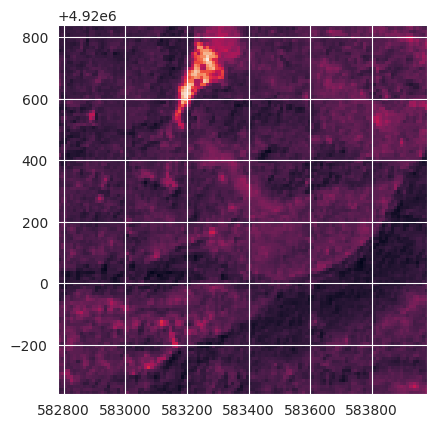

<Axes: >

In [ ]:
ds = gdal.BuildVRT( f'RGB_test_image.vrt',
                   raster_file_list_m,
                    separate=True, #keep files in separate bands, useful for files covering the same area
                    VRTNodata=0,
                    srcNodata=0)
ds = None
dst = rasterio.open('RGB_test_image.vrt')
print(dst.meta)
plot.show(dst)

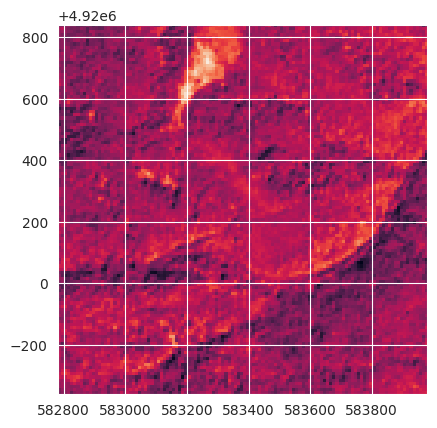

<Axes: >

In [ ]:
plot.show((dst,2))

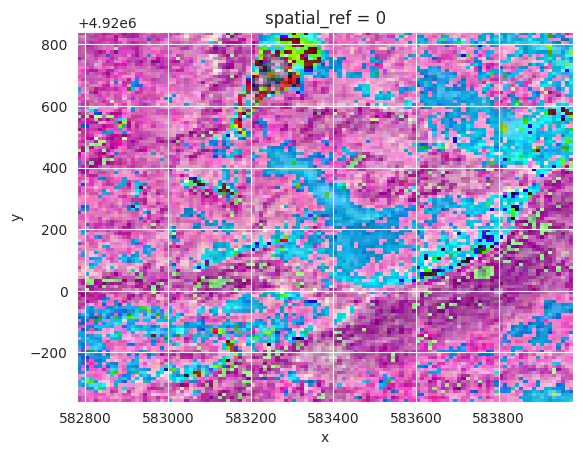

In [ ]:
rds = rxr.open_rasterio('RGB_test_image.vrt', masked=True,cache=False)
rds
rds.astype("uint8").plot.imshow(rgb="band",robust=True) #conversion does not work because we went from 1 to 10000 to 0-255 range

[91.0, 806.0, 233.35652777777779, 58.57188934358363]
gdal_translate -scale_1 91.0 806.0 0 255 -scale_2 145.0 727.0 0 255 -scale_3 80.0 491.0 0 255 -ot Byte RGB_test_image.vrt RGB_test_image_stretched.tif
<class 'xarray.core.dataarray.DataArray'>


/usr/local/lib/python3.10/dist-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


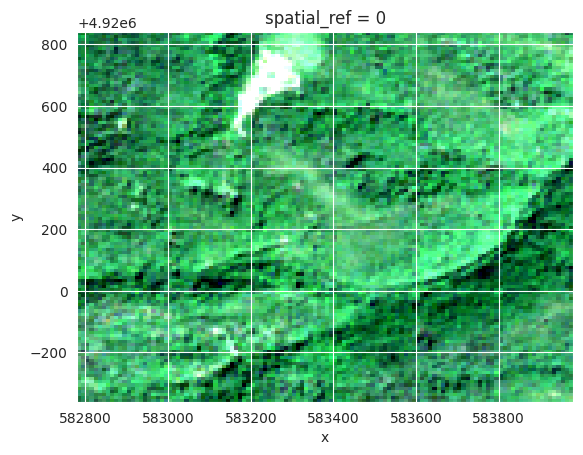

In [ ]:

out_filename,cmd_str=create_RGB(in_filename='RGB_test_image.vrt',
           out_filename='RGB_test_image_stretched.tif',
           scale_list=None,
           out_dtype='Byte')
print(cmd_str)
rds = rxr.open_rasterio('RGB_test_image_stretched.tif', masked=True,cache=False)
print(type(rds))
rds.astype("uint8").plot.imshow(rgb="band",robust=True)

Let's take a look at the xarray information provide for the dataset.

In [ ]:
rds

<xarray.DataArray (band: 3, y: 120, x: 120)>
[43200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.828e+05 5.828e+05 5.828e+05 ... 5.84e+05 5.84e+05
  * y            (y) float64 4.921e+06 4.921e+06 4.921e+06 ... 4.92e+06 4.92e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Sentinel 2 tiles are projected and distributed using UTM projection system. We can use the EPSG code to get more specific information on the projection. We can break down the code this way:

326:
are the three digits for UTM EPSG code referring to North zones

34:
are the two digits referring to the UTM zone 34.

Note that the three digits code for Southern regions used in UTM EPSG are '327'.

In [ ]:
crs_val = dst.crs #rasterio.crs.CRS
print(type(crs_val))
epsg_code = crs_val.to_epsg()#extract the epsg code
epsg_code

<class 'rasterio.crs.CRS'>


32634

We can plot more context using folium and a background basemap. First we convert the extent/footprint into a polygon and geodataframe. This allows us to see that the image patch is located in Serbia not far from the border with Romania near the Danube river.

In [ ]:
from shapely.geometry import box
gdf_footprint = gpd.GeoDataFrame({"id":1,"geometry":[box(*dst.bounds)]})
gdf_footprint.crs = dst.crs #need to set the crs, if you don't set the crs the backround map won't show up
gdf_footprint.explore()

In [ ]:
in_dir_files =  os.path.join(in_dir,in_filename+'/**/')
file_pattern = f'*.json'
path_json = os.path.join(in_dir_files,file_pattern) #raw raster
files_json = glob.glob(path_json,recursive=True)
df_files_json = pd.DataFrame({'files':files_json})
print(df_files_json.shape)
print(df_files_json.columns)
df_files_json.head()

(258, 1)
Index(['files'], dtype='object')


,files
0,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_labels_metadata.json
1,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170613T101032_74_30/S2A_MSIL2A_20170613T101032_74_30_labels_metadata.json
2,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170818T112109_25_3/S2B_MSIL2A_20170818T112109_25_3_labels_metadata.json
3,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170829T105019_27_2/S2B_MSIL2A_20170829T105019_27_2_labels_metadata.json
4,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170701T093031_2_5/S2A_MSIL2A_20170701T093031_2_5_labels_metadata.json


In [ ]:
#slow it took almost two minutes
import json
list_json_val = []
for file_val in df_files_json['files'].tolist():
  with open(file_val) as json_file:
      data = json.load(json_file)
  data_json_val = pd.json_normalize(data) #deal with nested structure in json
  data_json_val['file']=file_val
  data_json_val['patch_name'] = os.path.basename(os.path.dirname(file_val))
  list_json_val.append(data_json_val)
df_json_val = pd.concat(list_json_val,axis=0).reset_index(drop=True)
df_json_val.to_csv('df_json_val.csv')
print(df_json_val.columns)
df_json_val

Index(['labels', 'projection', 'tile_source', 'acquisition_date',
       'coordinates.ulx', 'coordinates.uly', 'coordinates.lrx',
       'coordinates.lry', 'file', 'patch_name'],
      dtype='object')


,labels,projection,tile_source,acquisition_date,coordinates.ulx,coordinates.uly,coordinates.lrx,coordinates.lry,file,patch_name
0,[Broad-leaved forest],"PROJCS[""WGS 84 / UTM zone 34N"",GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS 84"",6378137,298.257223563,AUTHORITY[""EPSG"",""7030""]],AUTHORITY[""EPSG"",""6326""]],PRIMEM[""Greenwich"",0,AUTHORITY[""EPSG"",""8901""]],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]],AXIS[""Latitude"",NORTH],AXIS[""Longitude"",EAST],AUTHORITY[""EPSG"",""4326""]],PROJECTION[""Transverse_Mercator""],PARAMETER[""latitude_of_origin"",0],PARAMETER[""central_meridian"",21],PARAMETER[""scale_factor"",0.9996],PARAMETER[""false_easting"",500000],PARAMETER[""false_northing"",0],UNIT[""metre"",1,AUTHORITY[""EPSG"",""9001""]],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH],AUTHORITY[""EPSG"",""32634""]]",S2B_MSIL1C_20170825T093029_N0205_R136_T34TEQ_20170825T093630.SAFE,2017-08-25 09:30:29,582780,4920840,583980,4919640,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_labels_metadata.json,S2B_MSIL2A_20170825T093029_69_66
1,"[Coniferous forest, Mixed forest, Sea and ocean]","PROJCS[""WGS 84 / UTM zone 34N"",GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS 84"",6378137,298.257223563,AUTHORITY[""EPSG"",""7030""]],AUTHORITY[""EPSG"",""6326""]],PRIMEM[""Greenwich"",0,AUTHORITY[""EPSG"",""8901""]],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]],AXIS[""Latitude"",NORTH],AXIS[""Longitude"",EAST],AUTHORITY[""EPSG"",""4326""]],PROJECTION[""Transverse_Mercator""],PARAMETER[""latitude_of_origin"",0],PARAMETER[""central_meridian"",21],PARAMETER[""scale_factor"",0.9996],PARAMETER[""false_easting"",500000],PARAMETER[""false_northing"",0],UNIT[""metre"",1,AUTHORITY[""EPSG"",""9001""]],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH],AUTHORITY[""EPSG"",""32634""]]",S2A_MSIL1C_20170613T101032_N0205_R022_T34VER_20170613T101025.SAFE,2017-06-13 10:10:32,588780,7064040,589980,7062840,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2A_MSIL2A_20170613T101032_74_30/S2A_MSIL2A_20170613T101032_74_30_labels_metadata.json,S2A_MSIL2A_20170613T101032_74_30
2,"[Non-irrigated arable land, Broad-leaved forest, Transitional woodland/shrub]","PROJCS[""WGS 84 / UTM zone 29N"",GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS 84"",6378137,298.257223563,AUTHORITY[""EPSG"",""7030""]],AUTHORITY[""EPSG"",""6326""]],PRIMEM[""Greenwich"",0,AUTHORITY[""EPSG"",""8901""]],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]],AXIS[""Latitude"",NORTH],AXIS[""Longitude"",EAST],AUTHORITY[""EPSG"",""4326""]],PROJECTION[""Transverse_Mercator""],PARAMETER[""latitude_of_origin"",0],PARAMETER[""central_meridian"",-9],PARAMETER[""scale_factor"",0.9996],PARAMETER[""false_easting"",500000],PARAMETER[""false_northing"",0],UNIT[""metre"",1,AUTHORITY[""EPSG"",""9001""]],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH],AUTHORITY[""EPSG"",""32629""]]",S2B_MSIL1C_20170818T112109_N0205_R037_T29SNB_20170818T112801.SAFE,2017-08-18 11:21:09,529980,4196400,531180,4195200,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170818T112109_25_3/S2B_MSIL2A_20170818T112109_25_3_labels_metadata.json,S2B_MSIL2A_20170818T112109_25_3
3,"[Discontinuous urban fabric, Non-irrigated arable land, Pastures, Complex cultivation patterns, Broad-leaved forest]","PROJCS[""WGS 84 / UTM zone 31N"",GEOGCS[""WGS 84"",DATUM[""WGS_1984"",SPHEROID[""WGS 84"",6378137,298.257223563,AUTHORITY[""EPSG"",""7030""]],AUTHORITY[""EPSG"",""6326""]],PRIMEM[""Greenwich"",0,AUTHORITY[""EPSG"",""8901""]],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9

#2. Data processing and reorganization

Next steps:

- create a tif file with RGB in one file (multiband)
- move RGB tif files to a specific new folder
- randomly select training, validation and testing using rows from data frmae
- use ImageDataGenerator.flow_from_dataframe


Useful links:

- https://vijayabhaskar96.medium.com/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe

In [ ]:
#create tif and move them to one unique folder
bands_pattern_val_list =['B04','B03','B02']

patch_name = df_files_raster_RGB['patch_name'].iloc[0]
raster_file_list_m = df_files_raster_RGB.loc[0,bands_pattern_val_list].tolist()
print(raster_file_list_m )
out_file_raster = f'{patch_name}_RGB_test_image.tif'
in_file_raster = f'{patch_name}_RGB_test_image.vrt'
ds = gdal.BuildVRT( in_file_raster,
                   raster_file_list_m,
                    separate=True, #keep files in separate bands, useful for files covering the same area
                    VRTNodata=0,
                    srcNodata=0)

gdal.Translate(out_file_raster,
               ds,
                format='GTiff',

                creationOptions=['COMPRESS:DEFLATE', 'TILED:YES'],
                callback=gdal.TermProgress_nocb)

del ds   # close the VRT
!du -sh $out_file_raster #check size of file

['/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B04.tif', '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B03.tif', '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/data/sampling_1/S2B_MSIL2A_20170825T093029_69_66/S2B_MSIL2A_20170825T093029_69_66_B02.tif']
60K	S2B_MSIL2A_20170825T093029_69_66_RGB_test_image.tif


In [ ]:
!ls -ltr

total 600
drwx------ 2 root root   4096 Mar 15 02:54 processed_images
-rw------- 1 root root   3049 Mar 18 19:09 S2B_MSIL2A_20170825T093029_69_66_RGB_test_image.vrt
-rw------- 1 root root 190100 Mar 19 13:43 df_files_raster_RGB.csv
-rw------- 1 root root   3107 Mar 19 13:43 RGB_test_image.vrt
-rw------- 1 root root  43886 Mar 19 13:43 RGB_test_image_stretched.tif
-rw------- 1 root root  60469 Mar 19 13:44 S2B_MSIL2A_20170825T093029_69_66_RGB_test_image.tif
-rw------- 1 root root 307899 Mar 19 13:44 df_json_val.csv


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 120, 'height': 120, 'count': 3, 'crs': CRS.from_epsg(32634), 'transform': Affine(10.0, 0.0, 582780.0,
       0.0, -10.0, 4920840.0)}


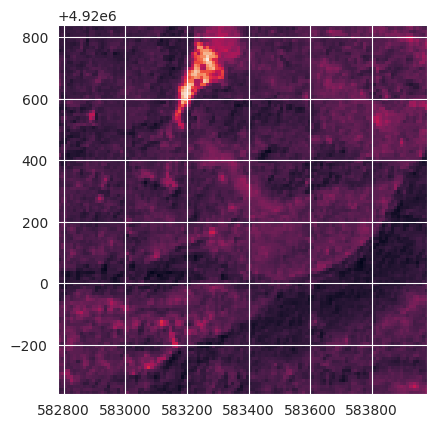

<Axes: >

In [ ]:
dst = rasterio.open(out_file_raster)
print(dst.meta)
plot.show(dst,1)

In [ ]:
#apply a function in a loop that will take
bands_pattern_val_list =['B04','B03','B02']

patch_name = df_files_raster_RGB['patch_name'].iloc[0]
raster_file_list_m = df_files_raster_RGB.loc[0,bands_pattern_val_list].tolist()
#print(raster_file_list_m )

def create_image_mulitband_tif(raster_image_list,prefix_name,out_dir,extension='.tif'):


  #Create a new directory
  if not os.path.exists(out_dir) :
      os.makedirs(out_dir)
  cw_in = os.getcwd()
  #print(cw_in)
  os.chdir(out_dir)

  #create tif and move them to one unique folder

  out_file_raster = f'{prefix_name}_image{extension}'
  in_file_raster = f'{prefix_name}_image.vrt'
  ds = gdal.BuildVRT( in_file_raster,
                    raster_file_list_m,
                      separate=True, #keep files in separate bands, useful for files covering the same area
                      VRTNodata=0,
                      srcNodata=0)

  if extension=='.tif':
    options_gdal = ['COMPRESS:DEFLATE', 'TILED:YES'],#if this should have this
  else:
    options_gdal = None

    gdal.Translate(out_file_raster,
                  ds,
                  #format=format,
                  creationOptions=options_gdal,
                  callback=gdal.TermProgress_nocb)

  del ds   # close the VRT
  os.chdir(cw_in)

  return out_file_raster

image_format = '.tif'
image_format = '.png'

create_image_mulitband_tif(raster_image_list=raster_file_list_m,
                           prefix_name=patch_name,
                           out_dir='processed_images',
                           extension=image_format)


'S2B_MSIL2A_20170825T093029_69_66_image.png'

In [ ]:
cd processed_images

/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images


In [ ]:
!gdalinfo S2B_MSIL2A_20170825T093029_69_66_image.png

Driver: PNG/Portable Network Graphics
Files: S2B_MSIL2A_20170825T093029_69_66_image.png
       S2B_MSIL2A_20170825T093029_69_66_image.png.aux.xml
Size is 120, 120
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 34N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 34N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",21,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["F

In [ ]:
def create_RGB_from_list(in_filename: list[str]|str,
               extension: str,
               scale_list: str,
               prefix_name: str='RGB',
               out_dir: str='.str',
               out_filename:None= str,
               out_dtype: str ='Byte') -> list[str,str]:

  '''

  Create RGB raster image from input a VRT file. This will compute the band statistics and scale values to visualize
  RGB using stretch (rescaling) with gdal_translate.

  :param in_filename: multiband input filename containing RGB band in the Red, Green and Blue order
  :param out_filename: output file name
  :param scale_list: list containing value of min and max trehsold to consider for streachign.

  '''


  if isinstance(in_filename, list):
    if prefix_name is not None:
      in_file_raster = f'{prefix_name}_image.vrt'

    ds = gdal.BuildVRT( in_file_raster,
                         in_filename,
                        separate=True, #keep files in separate bands, useful for files covering the same area
                        VRTNodata=0,#this should not be hard coded
                        srcNodata=0) #this should not be hard coded
    del ds   # close the VRT

  #if type(in_filename)==str:
  #  in_filename = [in_filename]

  #if type(scale_list)==str:
  #  scale_list = [scale_list]

    #create tif and move them to one unique folder

  if out_filename is None:
    out_filename = f'{prefix_name}_image{extension}'

  if out_dtype=='Byte':
    min_val=0
    max_val=255
  if out_dtype=='Float32':
    min_val=0
    max_val=1

    #Create a new directory
  if not os.path.exists(out_dir) :
      os.makedirs(out_dir)
  cw_in = os.getcwd()
  #print(cw_in)
  os.chdir(out_dir)


  if scale_list is None:
    ds = gdal.Open(in_filename)
    stats=ds.GetRasterBand(1).GetStatistics(0,1)
    print(stats)
    list_df_stats_RGB = []
    for band_val in (1,2,3):
      df_stats_val = update_raster_band_stats(in_filename,band_val=band_val)
      list_df_stats_RGB.append(df_stats_val)
    df_stats_RGB = pd.concat(list_df_stats_RGB).reset_index()
  else:
    list_vals = np.array(scale_list)
    df_stats_RGB = pd.DataFrame(list_vals,columns=['min','max'])

  list_args = ['gdal_translate',
              f'-scale_1 {str(df_stats_RGB.loc[0,["min"]].values[0])} {str(df_stats_RGB.loc[0,["max"]].values[0])} {min_val} {max_val}',
              f'-scale_2 {str(df_stats_RGB.loc[1,["min"]].values[0])} {str(df_stats_RGB.loc[1,["max"]].values[0])} {min_val} {max_val}',
              f'-scale_3 {str(df_stats_RGB.loc[2,["min"]].values[0])} {str(df_stats_RGB.loc[2,["max"]].values[0])} {min_val} {max_val}',
              f'-ot {out_dtype}',
              in_filename,
              out_filename]
  cmd_str = ' '.join([str(elem) for elem in list_args])
  import subprocess
  env = os.environ.copy() #this is necessary in google colab
  output_sub = subprocess.check_output(cmd_str, shell=True, env=env,text=True)

  return out_filename,cmd_str

In [ ]:
list_vals = np.array([[0,10000],[0,10000],[0,10000]])
pd.DataFrame(list_vals,columns=['min','max'])

,min,max
0,0,10000
1,0,10000
2,0,10000


In [ ]:
if type([0,1]) is list:
  print('yes')

yes


In [ ]:
#!ls -ltr processed_images

Note that image_dataset_from_directory does not handle tif. Allowed formats are : .jpeg, .jpg, .png, .bmp, .gif.

In [ ]:
#apply a function in a loop that will take

#took 2-3 minutes
list_out_files_raster = []
bands_pattern_val_list =['B04','B03','B02']
image_format = '.tif'
image_format = '.png'

#should try to parallelize this
for i in range(len(df_files_raster_RGB)):
  #apply a function in a loop that will take
  patch_name = df_files_raster_RGB['patch_name'].iloc[i]
  raster_file_list_m = df_files_raster_RGB.loc[i,bands_pattern_val_list].tolist()
  #print(raster_file_list_m )
  out_file_raster = create_image_mulitband_tif(raster_image_list=raster_file_list_m,
                             prefix_name=patch_name,
                             out_dir='processed_images',
                             extension=image_format)
  list_out_files_raster.append(out_file_raster)


In [ ]:

out_filename,cmd_str=create_RGB(in_filename='RGB_test_image.vrt',
           out_filename='RGB_test_image_stretched.tif',
           scale_list=None,
           out_dtype='Byte')

In [ ]:
#https://stackoverflow.com/questions/35491274/split-a-pandas-column-of-lists-into-multiple-columns
#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)


In [ ]:
!ls -ltr processed_images/*.png | wc

#let's get all tif files with ID+

    258    2322   26248


In [ ]:
#df_data_image_files['']=pd.DataFrame(df_data_image_files['labels'].tolist(), index= df_data_image_files.index)

In [ ]:
list_out_files_raster[:2]
df_data_image_files = pd.DataFrame({'filename':list_out_files_raster})
df_data_image_files['patch_name'] = [val.replace(f'_image{image_format}','') for val in list_out_files_raster]
df_data_image_files['path']= os.path.join(out_dir,'processed_images')
print(df_data_image_files.shape)
df_data_image_files.head()

(258, 3)


,filename,patch_name,path
0,S2B_MSIL2A_20170825T093029_69_66_image.png,S2B_MSIL2A_20170825T093029_69_66,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images
1,S2A_MSIL2A_20170613T101032_74_30_image.png,S2A_MSIL2A_20170613T101032_74_30,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images
2,S2B_MSIL2A_20170818T112109_25_3_image.png,S2B_MSIL2A_20170818T112109_25_3,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images
3,S2B_MSIL2A_20170829T105019_27_2_image.png,S2B_MSIL2A_20170829T105019_27_2,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images
4,S2A_MSIL2A_20170701T093031_2_5_image.png,S2A_MSIL2A_20170701T093031_2_5,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images


In [ ]:
list_columns = ['labels', 'coordinates.ulx', 'coordinates.uly', 'coordinates.lrx','coordinates.lry', 'patch_name']
#df_json_val.columns
df_data_image_files = df_data_image_files.merge(df_json_val.loc[:,list_columns],on='patch_name',how='inner')
df_data_image_files

,filename,patch_name,path,labels,coordinates.ulx,coordinates.uly,coordinates.lrx,coordinates.lry
0,S2B_MSIL2A_20170825T093029_69_66_image.png,S2B_MSIL2A_20170825T093029_69_66,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,[Broad-leaved forest],582780,4920840,583980,4919640
1,S2A_MSIL2A_20170613T101032_74_30_image.png,S2A_MSIL2A_20170613T101032_74_30,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Coniferous forest, Mixed forest, Sea and ocean]",588780,7064040,589980,7062840
2,S2B_MSIL2A_20170818T112109_25_3_image.png,S2B_MSIL2A_20170818T112109_25_3,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Non-irrigated arable land, Broad-leaved forest, Transitional woodland/shrub]",529980,4196400,531180,4195200
3,S2B_MSIL2A_20170829T105019_27_2_image.png,S2B_MSIL2A_20170829T105019_27_2,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Discontinuous urban fabric, Non-irrigated arable land, Pastures, Complex cultivation patterns, Broad-leaved forest]",532380,5597640,533580,5596440
4,S2A_MSIL2A_20170701T093031_2_5_image.png,S2A_MSIL2A_20170701T093031_2_5,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Non-irrigated arable land, Coniferous forest, Mixed forest]",602400,6994020,603600,6992820
...,...,...,...,...,...,...,...,...
253,S2B_MSIL2A_20170808T094029_62_61_image.png,S2B_MSIL2A_20170808T094029_62_61,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Coniferous forest, Transitional woodland/shrub]",374400,6026820,375600,6025620
254,S2A_MSIL2A_20170827T092031_19_79_image.png,S2A_MSIL2A_20170827T092031_19_79,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Non-irrigated arable land, Complex cultivation patterns]",622800,4905240,624000,4904040
255,S2B_MSIL2A_20170824T100019_43_8_image.png,S2B_MSIL2A_20170824T100019_43_8,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Non-irrigated arable land, Complex cultivation patterns, Broad-leaved forest]",551580,5190420,552780,5189220
256,S2A_MSIL2A_20170701T093031_72_87_image.png,S2A_MSIL2A_20170701T093031_72_87,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images,"[Coniferous forest, Mixed forest, Transitional woodland/shrub, Peatbogs]",686400,6895620,687600,6894420


In [ ]:
#test_val_df = df_data_image_files['labels'].apply(', '.join)
#test_val_df = test_val_df.str.split(',', expand=True)
#test_val_df = pd.DataFrame(test_val_df)
#(test_val_df)
#pd.get_dummies(test_val_df)

Let's do train test split using the following proportions:
- training: 70 %
- testing: 20 %
- validation: 10%

In [ ]:
df_data_image_files['file_with_path'] = df_data_image_files_train['path'] + os.sep + df_data_image_files_train['filename']

df_data_image_files_train = df_data_image_files.sample(frac=0.7)
patch_names_train = df_data_image_files_train['patch_name'].tolist()

df_data_images_files_test = (df_data_image_files.loc[~df_data_image_files['patch_name'].isin(patch_names_train)]
                   .sample(frac=(0.2/(1-0.7)))
)
patch_names_test = df_data_images_files_test['patch_name'].tolist()

list_to_screen = patch_names_test + patch_names_train
df_data_image_files_val = df_data_image_files.loc[~df_data_image_files['patch_name'].isin(list_to_screen)]

print(df_data_image_files_train.shape)
print(df_data_images_files_test.shape)
print(df_data_image_files_val.shape)
#len(patch_names_test)
#len(patch_names_train)

(181, 9)
(51, 9)
(26, 9)


In [ ]:
df_data_image_files_train.columns

Index(['filename', 'patch_name', 'path', 'labels', 'coordinates.ulx',
       'coordinates.uly', 'coordinates.lrx', 'coordinates.lry',
       'file_with_path'],
      dtype='object')

https://towardsdatascience.com/multi-label-image-classification-in-tensorflow-2-0-7d4cf8a4bc72

Now let's copy images from training,testing and validation in different folders before creating a tf.data.Dataset object to train the model.

In [ ]:
list_files_train = df_data_image_files_train['file_with_path'].tolist()
list_files_train[:3]

['/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images/S2B_MSIL2A_20170825T093029_84_87_image.png',
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/satellite_land_cover_scene_image_classification/outputs/output_data_lc_2024-03-12/processed_images/S2A_MSIL2A_20170803T094031_83_24_image.png',
 nan]

In [ ]:
#need to convert to 0-1 scale and float!!!

In [ ]:
#dataset_train = tf.data.Dataset.list_files(df_data_image_files_train['file_with_path'].tolist())
dataset_train = tf.data.Dataset.from_tensor_slices(df_data_image_files_train['file_with_path'].tolist())


ValueError: Can't convert Python sequence with mixed types to Tensor.

In [ ]:

import shutil

# raw images for training
if not os.path.exists(os.path.join(in_dir,'train')):
  os.makedirs(os.path.join(in_dir,'train'))
if not os.path.exists(os.path.join(in_dir,'train','sat')):
  os.makedirs(os.path.join(in_dir,'train','sat'))

#copy the tif file with hyperpsctral bands from AVIRIS
src = files_raster_sat[0]
dst= os.path.join(in_dir,
                  'train',
                  'sat',
                   os.path.basename(files_raster_sat[0]))
shutil.copyfile(src, dst)


#Classified images for training
if not os.path.exists(os.path.join(in_dir,'train')):
  os.makedirs(os.path.join(in_dir,'train'))
if not os.path.exists(os.path.join(in_dir,'train','map')):
  os.makedirs(os.path.join(in_dir,'train','map'))

data_dir_ground_truth_filename = os.path.join(data_dir,'documentation',
                                              'Site3_Project_and_Ground_Reference_Files',
                                              '19920612_AVIRIS_IndianPine_Site3_gr.tif')

src = data_dir_ground_truth_filename
dst= os.path.join(in_dir,
                  'train',
                  'map',
                  os.path.basename(data_dir_ground_truth_filename))
shutil.copyfile(src, dst)

# 2nd option
#shutil.copy(src, dst)  # dst can be a folder; use shutil.copy2() to preserve timestamp
files_df = generate_files_data_df(in_path=in_dir)
files_df

In [ ]:
#https://stackoverflow.com/questions/72600040/image-dataset-from-directory-for-multilabel-classifcation
ds = tf.keras.utils.image_dataset_from_directory(
        image_dir,
        labels=None,
        ...
    )

ds = tf.data.Dataset.zip((ds, tf.data.Dataset.from_tensor_slices(labels_list)))




You may need to use ImageDataGenerator:
'	string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.'

Useful links:

- https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

- https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d

https://stackoverflow.com/questions/73701637/how-can-i-create-a-tensorflow-image-dataset-labelled-by-filenames-from-multiple


In [ ]:
#we may need to change to float type and rescale between 0-1

In [ ]:
#https://www.tensorflow.org/guide/data
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

In [ ]:
#from keras_preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import ImageDataGenerator #this is deprecated
#https://stackoverflow.com/questions/72600040/image-dataset-from-directory-for-multilabel-classifcation

#from tf.keras.preprocessing.image import ImageDataGenerator


'''
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_dataframe(
dataframe=df[:1800],
directory="./miml_dataset/images",
x_col="Filenames",
y_col="labels",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=["desert", "mountains", "sea", "sunset", "trees"],
target_size=(100,100))
valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[1800:1900],
directory="./miml_dataset/images",
x_col="Filenames",
y_col="labels",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=["desert", "mountains", "sea", "sunset", "trees"],
target_size=(100,100))
test_generator=test_datagen.flow_from_dataframe(
dataframe=df[1900:],
directory="./miml_dataset/images",
x_col="Filenames",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))
''

SyntaxError: incomplete input (<ipython-input-53-eec733ad28ae>, line 4)

#3. **Build and train model**
- resnet model pre-trained on Imagenet
- resnet model pre-trained on bigearthnet
- fit and train models


## 3.0 Custom model

In [ ]:
#simple CNN model as baseline

##3.1 resnet50 imagenet pre-trained

In [ ]:
#https://www.kaggle.com/models/tensorflow/resnet-50
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1")
])
m.build([None, 224, 224, 3])  # Batch input shape.

##3.2 resnet50 bigearhnet pre-trained

In [ ]:
#https://www.kaggle.com/models/google/resnet50?tfhub-redirect=true
#module = hub.module("https://www.kaggle.com/models/google/resnet50/frameworks/TensorFlow1/variations/remote-sensing-bigearthnet-resnet50/versions/1")
#images = ...  # A batch of images with shape [batch_size, height, width, 3].
#features = module(images)  # Features with shape [batch_size, num_features].

In [ ]:
module_url = "https://www.kaggle.com/models/google/resnet50/frameworks/TensorFlow1/variations/remote-sensing-bigearthnet-resnet50/versions/1"
model_resnet50_r = hub.load(module_url)
#https://www.tensorflow.org/hub/tf2_saved_model
model_resnet50_r

In [ ]:
num_classes=19


In [ ]:

inputs = Input(shape=(224,224,3))
resnet_bigearth =hub.KerasLayer(module_url)(inputs)
#x = layers.Dense(256,activation = 'relu')(resnet_bigearth)
x = layers.Dropout(0.2)(resnet_bigearth)
outputs = tf.keras.layers.Dense(num_classes, activation='Softmax', name='classifier')(x)
model = tf.keras.Model(inputs, outputs)
#model = tf.keras.Model(inputs, resnet_bigearth)
model._name = 'model_bigearthnet' # set keras model name

## Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model_bigearthnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 keras_layer (KerasLayer)    (None, 2048)              23633899  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 classifier (Dense)          (None, 19)                38931     
                                                                 
Total params: 23672830 (90.30 MB)
Trainable params: 38931 (152.07 KB)
Non-trainable params: 23633899 (90.16 MB)
_________________________________________________________________


In [ ]:
resnet_bigearth.get_shape()

TensorShape([None, 2048])

#4. **Accuracy Assessment**
- use test data to generate an accuracy assessment
- assess accuracy using precision and recall.


#5. **Conclusions**

In [ ]:
############################# END OF SCRIPT ###################################